In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix

import numpy as np
import matplotlib.pyplot as plt
from time import time
import shutil

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

5


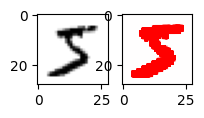

In [3]:
print(train_labels[0])
plt.figure(figsize=(2,2))
plt.subplot(1,2,1)
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.subplot(1,2,2)
plt.imshow(train_images[0], cmap='bwr', vmin=-1, vmax=1)

In [4]:
# NORMALIZAMOS DATOS
train_images = train_images / 255
test_images = test_images / 255

mean_img = train_images.mean(axis=0)
train_images = train_images - mean_img
test_images = test_images - mean_img

5


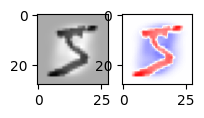

In [5]:
print(train_labels[0])
plt.figure(figsize=(2,2))
plt.subplot(1,2,1)
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.subplot(1,2,2)
plt.imshow(train_images[0], cmap='bwr', vmin=-1, vmax=1)

------------- MODELO ------------- 

In [6]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28), name="entrada"))
model.add(keras.layers.Dense(30, activation="sigmoid", name="oculta"))
model.add(keras.layers.Dense(10, activation="softmax", name="salida"))

In [7]:
model.summary()
# tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 entrada (Flatten)           (None, 784)               0         
                                                                 
 oculta (Dense)              (None, 30)                23550     
                                                                 
 salida (Dense)              (None, 10)                310       
                                                                 
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


-------- COMPILADOR -------- 

In [8]:
model.compile(
            optimizer   = keras.optimizers.SGD(learning_rate=0.01), 
            loss        = 'sparse_categorical_crossentropy',
            metrics     =['acc']
            )

------- ENTRENAMIENTO --------

In [9]:
nepochs = 100

In [10]:
history = model.fit(train_images, 
                    train_labels, 
                    epochs=nepochs, 
                    validation_data=(test_images, test_labels),
                    batch_size=1000)

Epoch 1/100
60/60 [==============================] - 2s 19ms/step - loss: 2.4326 - acc: 0.0987 - val_loss: 2.3322 - val_acc: 0.0965
Epoch 2/100
60/60 [==============================] - 1s 11ms/step - loss: 2.2719 - acc: 0.1138 - val_loss: 2.2219 - val_acc: 0.1733
Epoch 3/100
60/60 [==============================] - 1s 11ms/step - loss: 2.1853 - acc: 0.2862 - val_loss: 2.1476 - val_acc: 0.3781
Epoch 4/100
60/60 [==============================] - 1s 11ms/step - loss: 2.1210 - acc: 0.4326 - val_loss: 2.0871 - val_acc: 0.4964
Epoch 5/100
60/60 [==============================] - 1s 11ms/step - loss: 2.0659 - acc: 0.5117 - val_loss: 2.0330 - val_acc: 0.5510
Epoch 6/100
60/60 [==============================] - 1s 11ms/step - loss: 2.0152 - acc: 0.5555 - val_loss: 1.9823 - val_acc: 0.5873
Epoch 7/100
60/60 [==============================] - 1s 11ms/step - loss: 1.9670 - acc: 0.5863 - val_loss: 1.9337 - val_acc: 0.6112
Epoch 8/100
60/60 [==============================] - 1s 11ms/step - loss: 1.

--------- VISUALIZACION RESULTADOS -----------

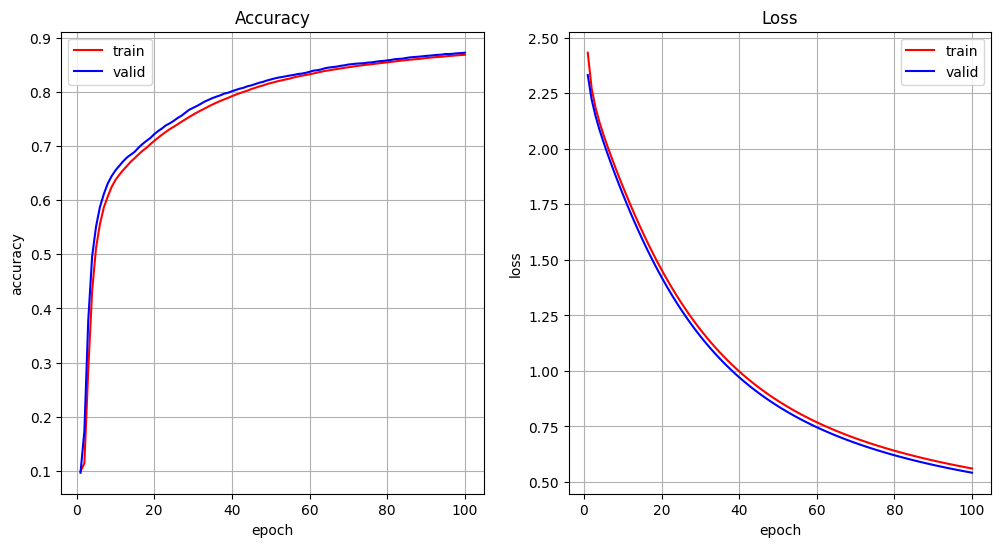

In [11]:
hd = history.history

epochs = range(1, nepochs+1)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(epochs, hd['acc'], "r", label="train")
plt.plot(epochs, hd['val_acc'], "b", label="valid")
plt.grid(True)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, hd['loss'], "r", label="train")
plt.plot(epochs, hd['val_loss'], "b", label="valid")
plt.grid(True)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Loss")
plt.legend()

plt.show()

In [12]:
loss_test, acc_test = model.evaluate(test_images, test_labels)
print("Loss on test set = %f" % (loss_test))
print("Accuracy on test set = %f" % (acc_test))

313/313 [==============================] - 2s 4ms/step - loss: 0.5419 - acc: 0.8726
Loss on test set = 0.541902
Accuracy on test set = 0.872600


------------- PREDICCION ------------- 

In [13]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [14]:
y_test = np.argmax(predictions, axis=1)
aciertos = y_test == test_labels
acc_v2 = np.mean(aciertos)
print("Accuracy on test set (v2)= %f" % (acc_v2))

Accuracy on test set (v2)= 0.872600


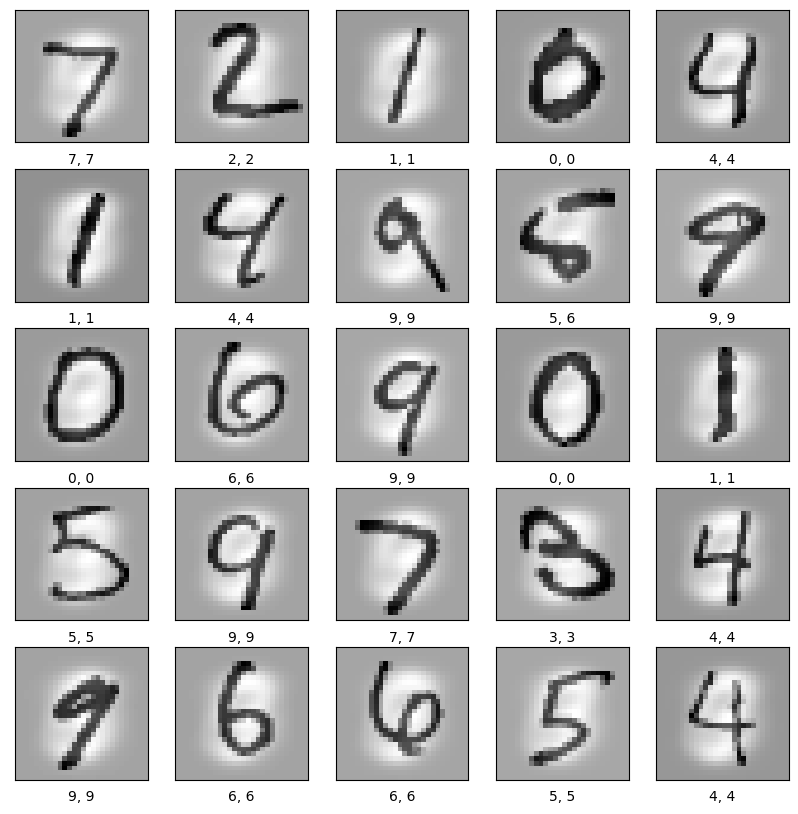

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("%d, %d" % (test_labels[i], y_test[i]))

----------- MATRIZ DE CONFUSION -----------

In [16]:
confusion_matrix(test_labels, y_test)

array([[ 953,    0,    3,    2,    0,    7,   11,    1,    3,    0],
       [   0, 1091,    3,    5,    0,    3,    4,    0,   29,    0],
       [  19,   23,  866,   20,   17,    3,   24,   21,   34,    5],
       [   4,    4,   24,  868,    1,   38,   10,   24,   33,    4],
       [   1,    8,    5,    0,  864,    3,   16,    2,    9,   74],
       [  19,   24,    8,   84,   29,  669,   20,   14,   17,    8],
       [  18,    6,   14,    1,   18,   17,  883,    0,    1,    0],
       [   4,   31,   27,    1,   10,    0,    1,  910,    6,   38],
       [  12,   24,   18,   39,   19,   39,   15,   14,  769,   25],
       [  16,    8,    9,    9,   60,   12,    1,   35,    6,  853]],
      dtype=int64)